In [1]:
from pathlib import Path
import numpy as np


import geopandas as gpd

import rasterio as rio
import matplotlib.pyplot as plt


from GDRT.raster.register_images import align_two_rasters
from GDRT.raster.registration_algorithms import sitk_intensity_registration

In [2]:
DATA_FOLDER = "/ofo-share/repos-david/UCNRS-experiments/data/"
RASTER_FOLDER = "CHMs"
RASTER_PREFIX = "chm-mesh"

DATASET_IDS = [
    ("630", "931"),
    ("919", "625"),
    ("921", "629"),
    ("618", "576"),
    ("612", "908"),
    ("911", "560"),
    ("913", "614"),
    ("921", "627"),
    ("908", "479"),
]


TARGET_GSD = 0.5

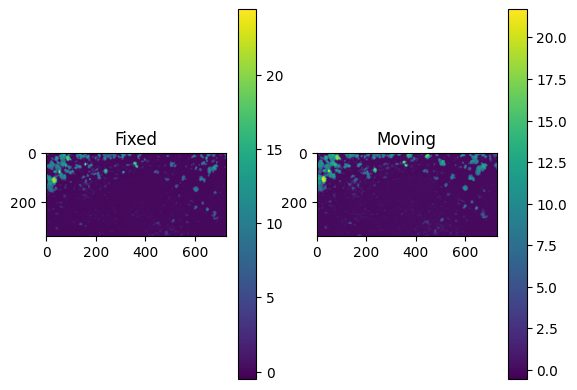

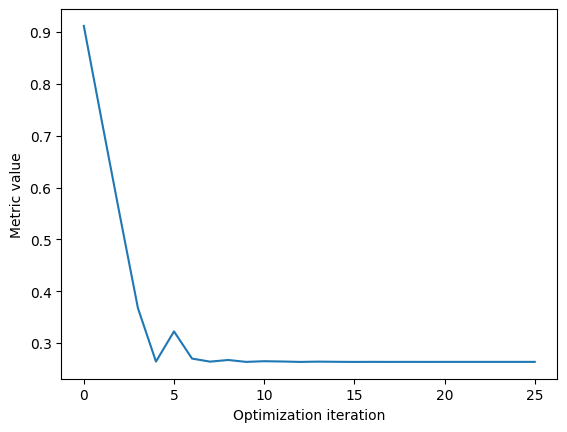

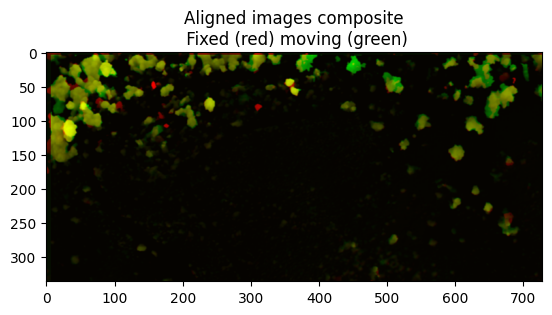

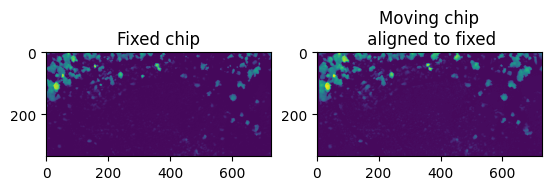

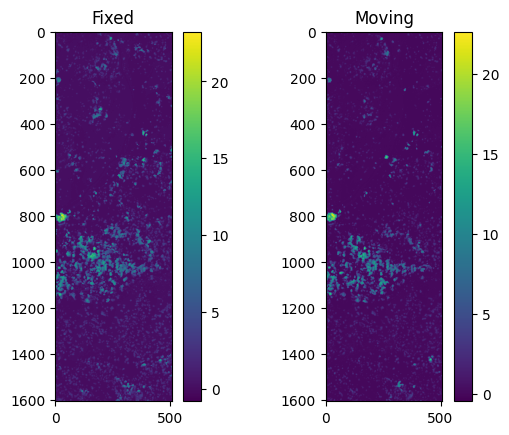

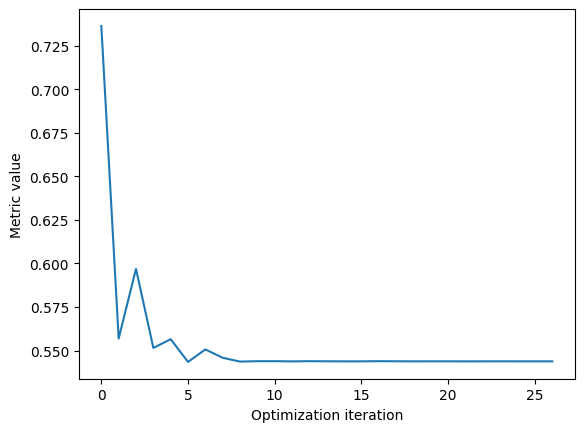

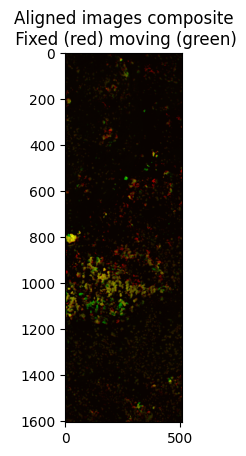

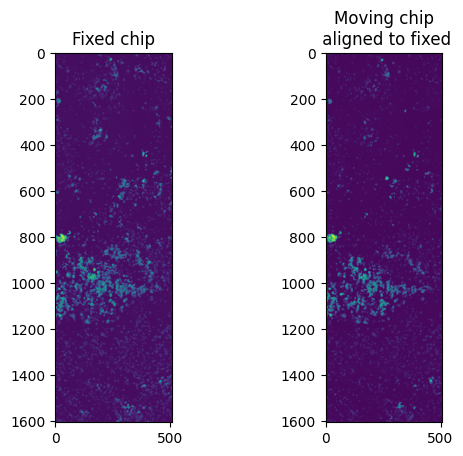

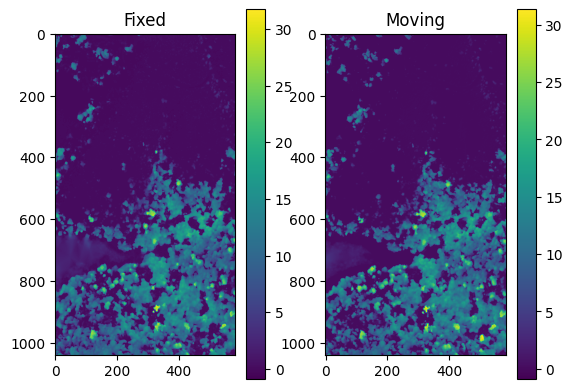

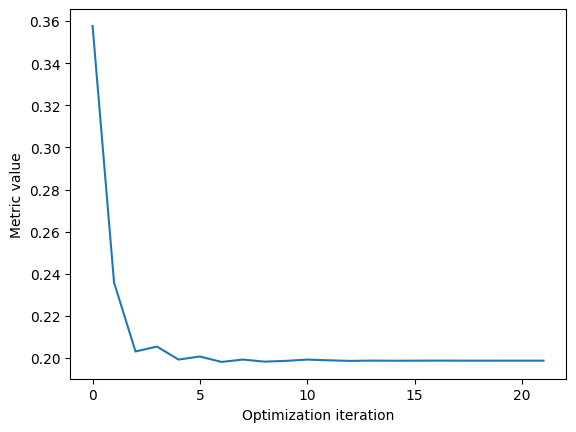

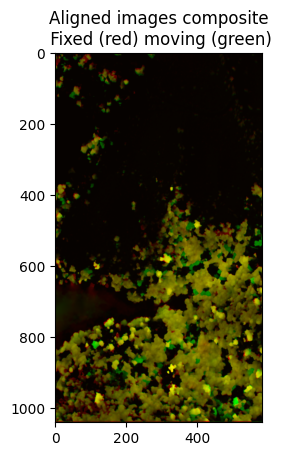

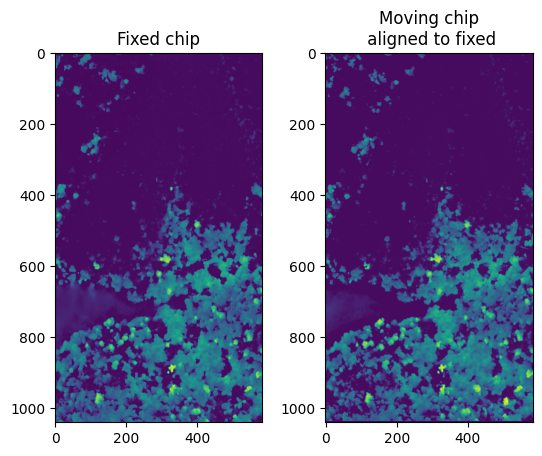

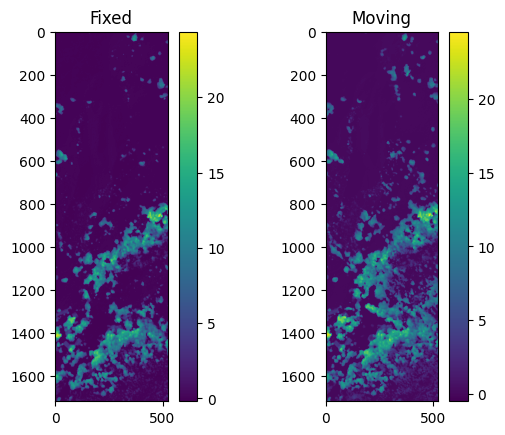

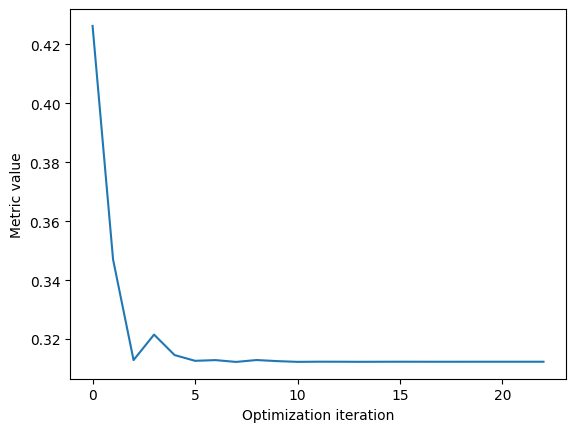

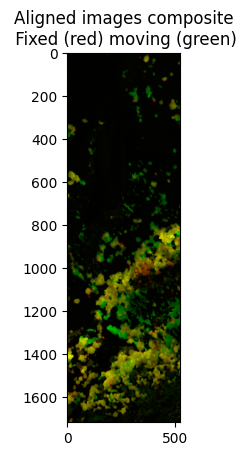

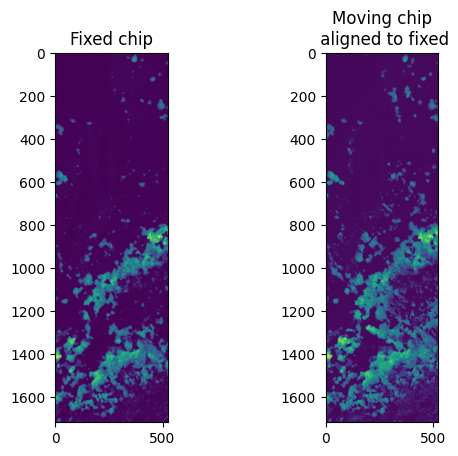

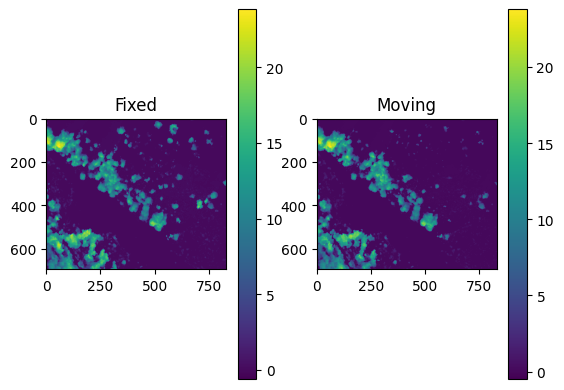

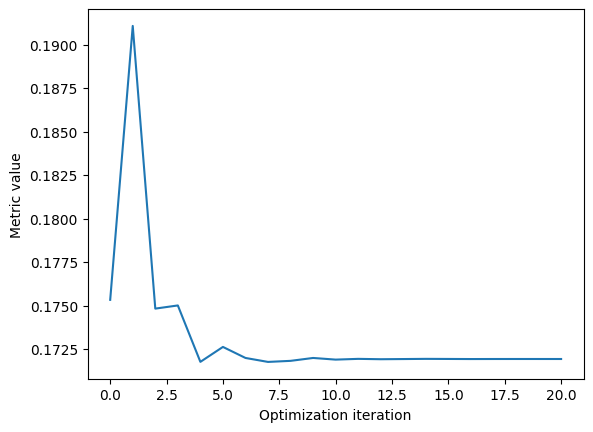

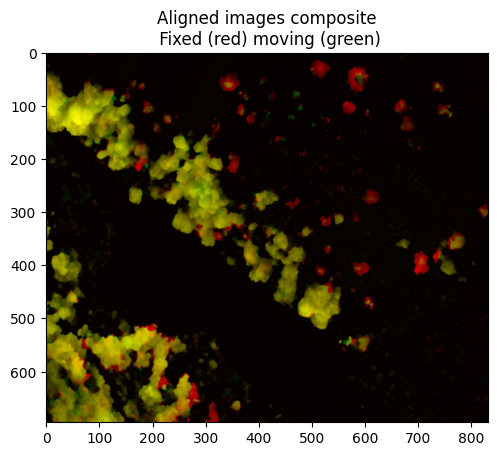

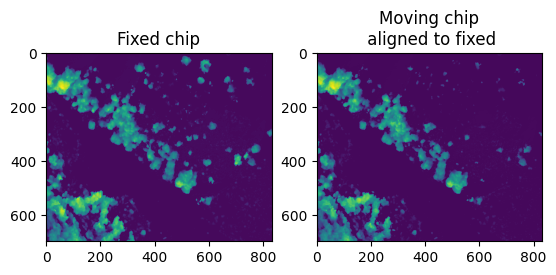

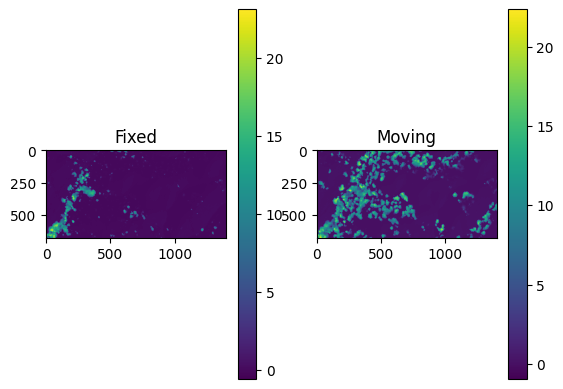

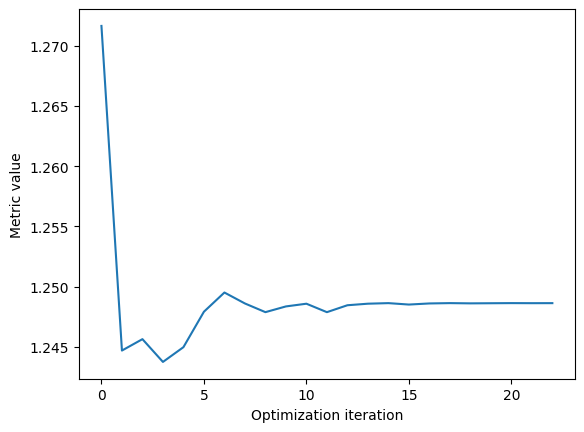

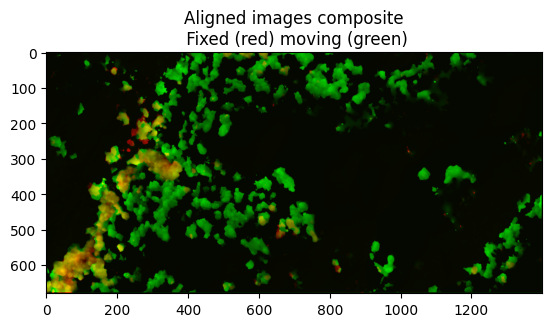

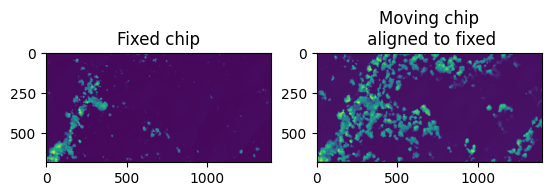

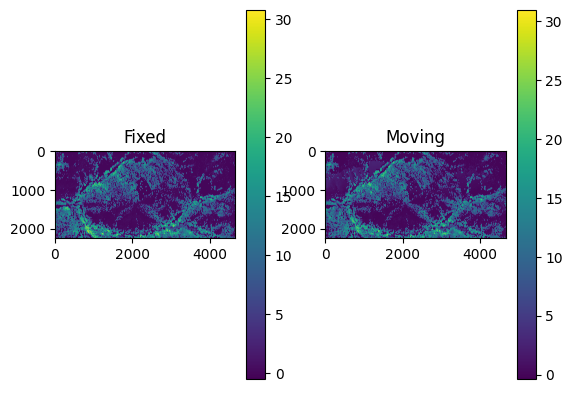

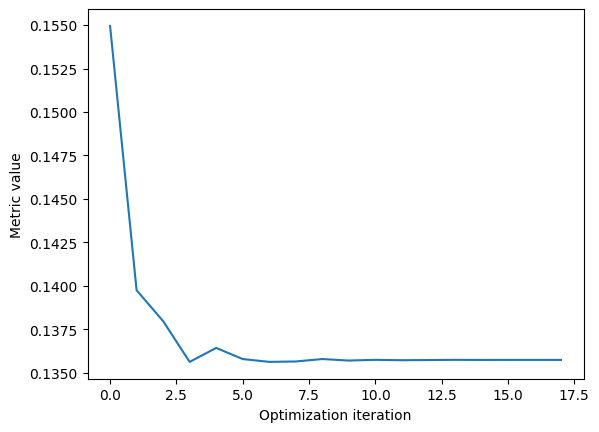

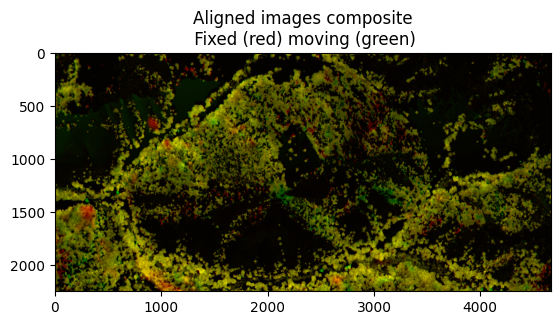

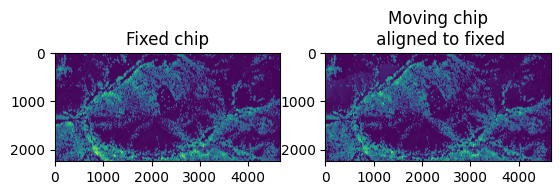

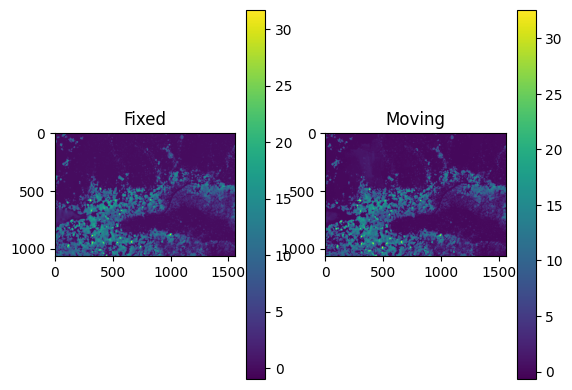

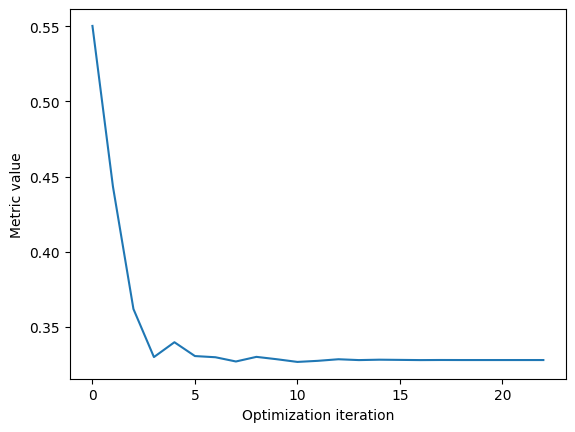

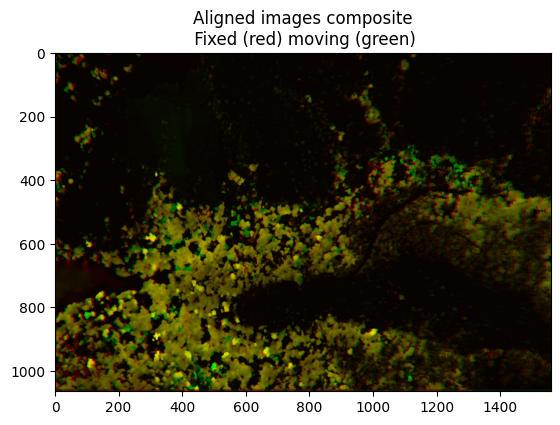

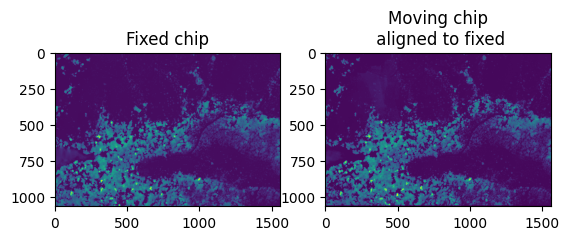

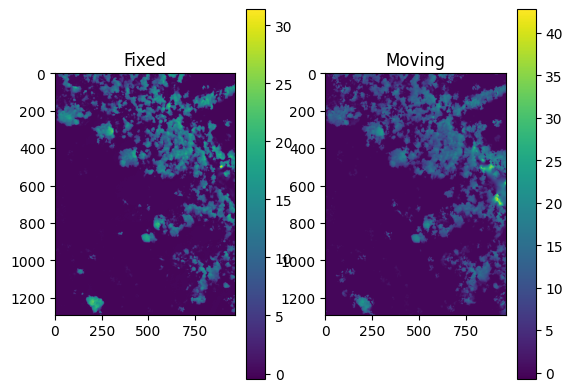

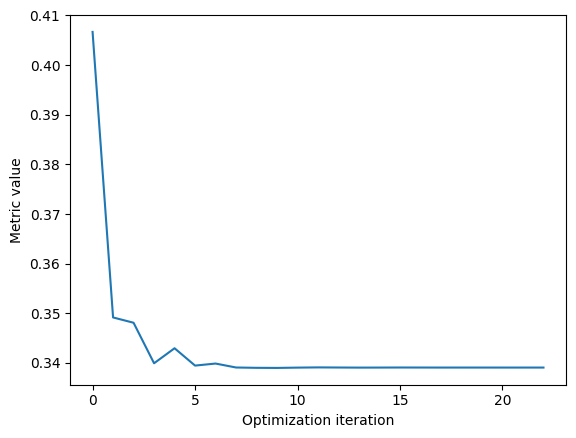

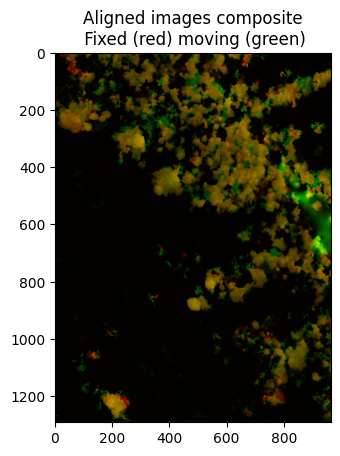

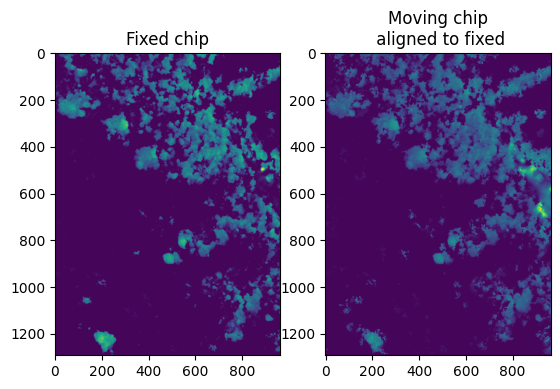

In [3]:
predicted_shifts = []

for WHICH_DATASET in range(9):
    dataset_ids = DATASET_IDS[WHICH_DATASET]
    FIXED_CHM_FILENAME = Path(DATA_FOLDER, RASTER_FOLDER, f"{RASTER_PREFIX}-{dataset_ids[0]}.tif")
    MOVING_CHM_FILENAME = Path(DATA_FOLDER, RASTER_FOLDER, f"{RASTER_PREFIX}-{dataset_ids[1]}.tif")

    transforms = align_two_rasters(
        FIXED_CHM_FILENAME,
        MOVING_CHM_FILENAME,
        aligner_alg=sitk_intensity_registration,
        target_GSD=TARGET_GSD,
        vis_chips=True,
        vis_kwargs={},
    )
    predicted_shifts.append((transforms["geospatial_mv2fx_transform"][0, 2], transforms["geospatial_mv2fx_transform"][1,2]))

In [4]:
predicted_shifts = np.array(predicted_shifts)
print(predicted_shifts)

[[ 3.57185229 -1.89621917]
 [ 1.22249305 -0.42575461]
 [ 0.77260967  1.58351131]
 [ 1.66334619 -1.11095454]
 [-0.12515197  0.15449259]
 [-0.49940075  1.1341379 ]
 [-0.64383564  0.26585979]
 [ 1.88766757  2.29518518]
 [ 0.7156572   1.33580435]]


In [5]:
manual_shifts = np.array(
    [
        [3.67333011, -2.03344836],
        [1.21451527, 0.09520919],
        [2.6858655, 1.77633428],
        [1.81378553, -1.08913454],
        [0.57881108, 0.64201424],
        [-0.71228349, 0.94996558],
        [0.06633053, -0.01025167],
        [1.30942181, 1.63943084],
        [0.7517346, 1.18608131],
    ]
)

diffs = predicted_shifts - manual_shifts
discrepencies = np.linalg.norm(diffs, axis=1)
print(f"Discrepencies in meters between manual and predicted shifts: {discrepencies}")

Discrepencies in meters between manual and predicted shifts: [0.17067395 0.52102488 1.92294789 0.15201351 0.85629512 0.28149334
 0.76195376 0.87428938 0.15400833]
